<div align="center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/a/a3/University_of_Isfahan-Logo.png" width="100" height="100">
</div>

<div dir="rtl" align="center">
  <h1> </h1>
  <h4> Isfahan University - Computer Science </h4>
  <h4 style="color:#3399FF"> Machine Learning </h4>
  <h5> March, 2024 </h5>
  <hr>
  <h2 style="color:#006633"> <strong>Univariate and multivariate linear regression with Gradient Decent</strong> </h2>
  <hr>
</div>

### Machine Learning Category
Machine learning can be classified into different types. One of the most common categories is as follows.


<div align="center">
    <img src="./img/diagram_ML.svg" style="width:100% height:380">
</div>

#### <strong style="color:#3399FF" > Supervised Learning </strong>
In supervised learning, the algorithm is trained on a labeled data set, where each input is associated with a corresponding output. The goal is for the algorithm to learn the mapping from input to output so that it can make predictions or classifications on new and unseen data. In fact, supervised learning can be divided into two categories: `regression` and `classification`.

#### <strong style="color:#3399FF" > Unsupervised Learning </strong>
Unsupervised learning is a type of machine learning where an algorithm is trained on unlabeled data and the system tries to find patterns, relationships, or structure in the data without explicit guidance on what to look for. The main goal is to discover the inherent structure of the data, often by discovering similarities, differences, or groupings among data points. Among the most famous algorithms of this category, we can mention `k-means`, `k-means++`, `MeanShift`, `Spectral Clustering`, `DBSCAN` and `Hierarchical Clustering`. Also, one of the most important applications of unsupervised algorithms is dimensionality reduction.

#### <strong style="color:#3399FF" > Semi-Supervised Learning </strong>
Semi-supervised learning is a type of machine learning that combines elements of both supervised and unsupervised learning. In semi-supervised learning, the algorithm is trained on a dataset that contains both labeled and unlabeled examples. The primary goal is to leverage the limited labeled data to improve the model's performance on a larger pool of unlabeled data. This category is one of the categories that fully emerges in more realistic applications, and to solve such problems, they use a combination of supervised and unsupervised algorithms.

#### <strong style="color:#3399FF" > Reinforcement Learning </strong>
Reinforcement Learning (RL) is a type of machine learning paradigm where an `agent` learns to make decisions by interacting with an `environment`. The agent takes `actions`, receives feedback in the form of `rewards` or penalties, and learns to improve its decision-making strategy over time to maximize cumulative rewards. Reinforcement learning is often used in scenarios where the optimal action or strategy is not explicitly known, and the agent needs to explore and learn through trial and error.

<div align="center">
    <img src="./img/RL.svg" style="width:50%;height:200px">
</div>

#### <strong style="color:#3399FF" > Transfer Learning </strong>
Transfer learning is a machine learning technique where a model developed for a particular task is reused as the starting point for a model on a second task. Essentially, the knowledge gained from solving one problem (source domain) is applied to a different but related problem (`target domain`). Transfer learning is particularly useful when the target task has limited labeled data, as knowledge acquired from the source task can help bootstrap the learning process. `Fine-tuning` is one of the important tasks in this area of learning.

### Hypothesis Representation

**Hypothesis set**. A set of functions mapping features (feature vectors) i.e. $\mathcal{X}$ to the set of labels $\mathcal{Y}$.

<!-- $$ H: $\phi$ : X * \THETA  R $$ -->
$$ \mathcal{H} = \{ \phi: \mathcal{X} \times \Theta \longrightarrow \mathbb{R}^C \} $$

where $\Theta$ are the learning parameters of the hypothesis and $C$ is number of classes (if problem is regression, then $C = 1$). The set of hypotheses has an infinity of members. This means that an infinite number of different hypotheses can be made according to the $\mathcal{X}$ and $\mathcal{Y}$. In machine learning, we look for a hypothesis that best estimates the target given the feature space. Now you might be wondering how to find the best hypothesis for a problem in machine learning? Or in other words, how to calculate the estimate of each hypothesis. In the following, we will get acquainted with a concept called `cost function` and we will explain in detail how it works.

### Univariate Linear Regression

One of the simplest supervised learning algorithms is univariate linear regression. The purpose of this algorithm is to construct and estimate a line with two variables of `slope` and `intercept`, whose names are $\theta_0$ and $\theta_1$, respectively. Therefore, the hypothesis of this algorithm is expressed as follows:

$$ \textit{h}_{\theta}(x_i) = \theta_0 + \theta_1 x_i \$$

where $x_i$ is $i$-th training data.

### Multivariate Linear Regression

While univariate linear regression has only one feature in its feature space and has a very limited application, multivariate linear regression has several variables in its feature space and can provide more accurate estimation of more complex problems. The hypothesis of this algorithm is expressed as follows by generalizing the univariate linear regression:

$$ \textit{h}_{\theta}(x_i) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n \$$

where $n$ is number of features. Also, `by adding a variable with the value always 1 to the feature space named` $x_0$, we can rewrite the above hypothesis as a multiplication of two vectors. we have:

$$ \textit{h}_{\theta}(x_i) = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n \$$

$\\$

$$ \textit{h}_{\theta}(x_i) = \begin{bmatrix} \theta_0 & \theta_1 & ... & \theta_n \end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \\ \vdots \\ x_n \end{bmatrix} = \theta^T X$$

In [1]:
import numpy as np
import pandas as pd

from matplotlib import cm
from matplotlib import pyplot as plt
from matplotlib.ticker import LinearLocator
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [2]:
np.set_printoptions(precision=3)

In [3]:
dataset = fetch_california_housing()

df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df['target'] = dataset['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
print(f"feature space (X): \n{dataset['data']}, {dataset['data'].shape}")
print()
print(f"target space (X): \n{dataset['target']}")

feature space (X): 
[[   8.325   41.       6.984 ...    2.556   37.88  -122.23 ]
 [   8.301   21.       6.238 ...    2.11    37.86  -122.22 ]
 [   7.257   52.       8.288 ...    2.802   37.85  -122.24 ]
 ...
 [   1.7     17.       5.206 ...    2.326   39.43  -121.22 ]
 [   1.867   18.       5.33  ...    2.123   39.43  -121.32 ]
 [   2.389   16.       5.255 ...    2.617   39.37  -121.24 ]], (20640, 8)

target space (X): 
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [5]:
df.loc[:, ['MedInc', 'target']]

,MedInc,target
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422
...,...,...
20635,1.5603,0.781
20636,2.5568,0.771
20637,1.7000,0.923
20638,1.8672,0.847


In [6]:
print(f"feature space (X): \n{df['MedInc'].values}, {df['MedInc'].values.shape}")
print()
print(f"target space (X): \n{dataset['target']}")

feature space (X): 
[8.325 8.301 7.257 ... 1.7   1.867 2.389], (20640,)

target space (X): 
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


### Cost function

The cost function is a function that receives two inputs, the actual value and the predicted value, and returns the difference between these two values as an output. In the past, we mentioned that which hypothesis is better than other hypotheses, and in order to recognize this issue, we must choose the hypothesis whose cost function value is in the lowest state. So it is natural that the main goal should be to `minimize the cost function`, in other words, we want the predicted value to have the smallest difference with the actual value. Therefore, to estimate the quality of a hypothesis, we use a concept called cost function. The general form of the cost function is as follows:

$$ \mathcal{L}: \mathbb{R}^C \times \mathcal{Y} \longrightarrow \mathbb{R}_{+} $$

One of the most famous cost functions is the `MSE` (mean square error) function, which is expressed as follows:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2$$

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x_i) - y_i)^2$$

therefore, for univariate linear regression, we have:

$$ \min_{\theta_0, \theta_1} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m} ((\theta_0 + \theta_1 x_i) - y_i)^2$$

and for multivariate linear regression:

$$ \min_{\theta_0, \theta_1, \dots, \theta_n} J(\theta_0, \theta_1, \dots, \theta_n) = \frac{1}{m} \sum_{i=1}^{m} ((\theta_0 x_0 + \theta_1 x_1 + \dots + \theta_n x_n) - y_i)^2$$

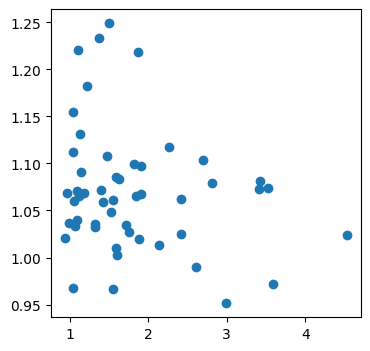

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))


_ = ax.scatter(df.loc[:50, 'target'], df.loc[:50, 'AveBedrms'])

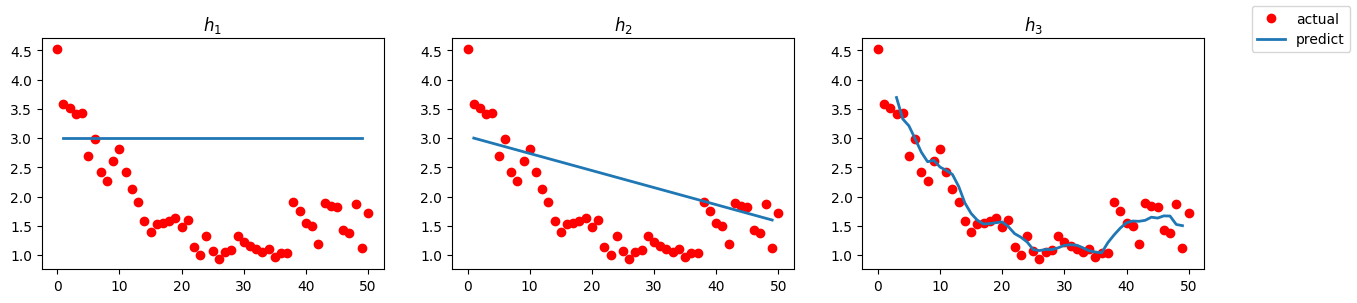

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))

for i, ax in enumerate(axes, start=1):
    ax.plot(df.loc[:50, 'target'], 'ro')
    ax.set_title(f"$h_{i}$")
    
_ = axes[0].plot(list(range(1, 50)), [3]*49, linewidth=2)
_ = axes[1].plot(list(range(1, 50)), np.linspace(3, 1.6, 49), linewidth=2)
_ = axes[2].plot(list(range(3, 50)), df.loc[:50, 'target'].rolling(window=5).mean()[4:], linewidth=2)

_ = fig.legend(labels=['actual', 'predict'])

In [7]:
def cost_function(X, y, theta):

    m = y.shape[0]
    h = X @ theta
    J = (1/2) * (h - y).T @ (h - y)
    return J

### Univariate Linear Regression Implementation

In [8]:
class UnivariateLinearRegression:
    def __init__(self, x, y) -> None:
        self.x = x
        self.y = y.reshape(-1, 1)
        self.X = np.vstack((np.ones(len(x)), x)).T
        self.m = self.y.shape[0]

    def gradient_descent(self, theta, learning_rate=0.001, num_iters=1000):

        costs = list()
        theta_0_hist, theta_1_hist = [], []

        for i in range(num_iters):

            h = self.X @ theta
            theta = theta - learning_rate * (self.X.T @ (h - self.y))

            costs.append(cost_function(self.X, self.y, theta))
            theta_0_hist.append(theta[0, 0])
            theta_1_hist.append(theta[1, 0])

        costs = np.array(costs)
        return theta, costs, theta_0_hist, theta_1_hist
    

In [136]:
x = df.loc[:20_600, 'MedInc'].values
y = df.loc[:20_600, 'target'].values


linear_reg = UnivariateLinearRegression(x, y)
init_theta = np.array([-5, -3]).reshape(-1, 1)
theta_result, costs, theta_0, theta_1 = linear_reg.gradient_descent(init_theta, learning_rate=0.000001, num_iters=2000)

In [137]:
theta_result

array([[0.452],
       [0.418]])

#### Visual Gradient Decent

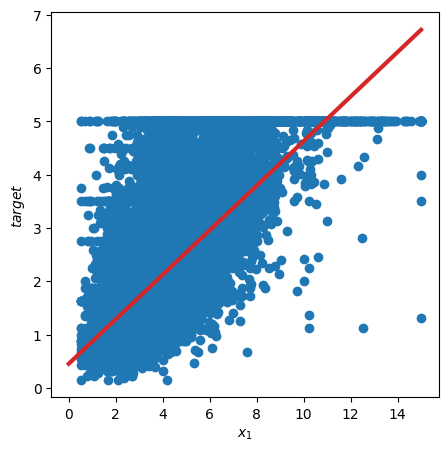

In [140]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(x, y)
_ = ax.plot(list(map(lambda x: theta_result[0][0] + x*theta_result[1][0], np.arange(0, 16, 1))), color='tab:red', linewidth=3)

_ = ax.set_xlabel("$x_1$")
_ = ax.set_ylabel("$target$")

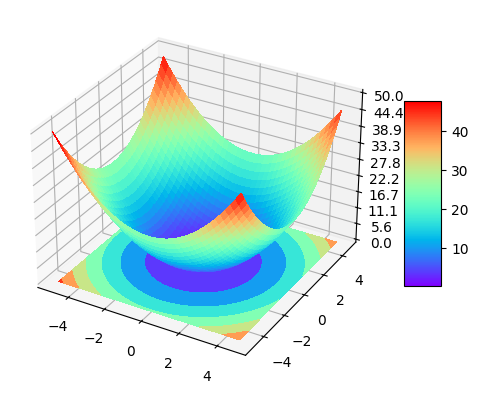

In [88]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow,
                       linewidth=0, antialiased=False)

_ = ax.zaxis.set_major_locator(LinearLocator(10))
_ = ax.zaxis.set_major_formatter('{x:.01f}')

_ = ax.contourf(X, Y, Z, zdir='Z', offset=0, cmap='rainbow')

_ = fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

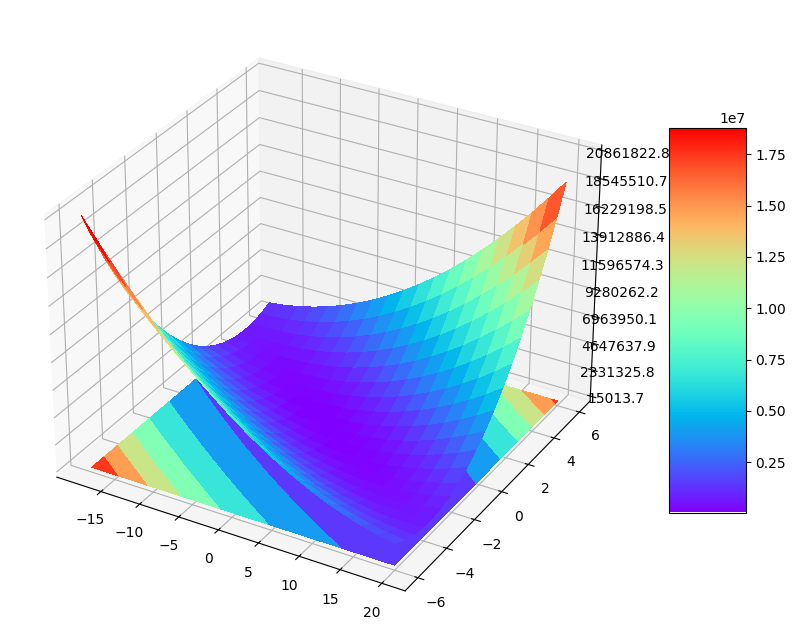

In [131]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))

T0, T1 = np.meshgrid(np.linspace(-18, 20, 20), np.linspace(-6, 6, 20))

zs = np.array(
    [
        cost_function(linear_reg.X, y.reshape(-1, 1), np.array([t0, t1]).reshape(-1, 1))
        for t0, t1 in zip(np.ravel(T0), np.ravel(T1))
    ]
)

Z = zs.reshape(T0.shape)

surf = ax.plot_surface(T0, T1, Z, cmap=cm.rainbow,
                       linewidth=0, antialiased=False)

_ = ax.zaxis.set_major_locator(LinearLocator(10))
_ = ax.zaxis.set_major_formatter('{x:.01f}')

_ = ax.contourf(T0, T1, Z, zdir='Z', offset=0, cmap='rainbow')

_ = fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [96]:
T0, T1 = np.meshgrid(np.linspace(-18, 20, 20), np.linspace(-6, 6, 20))

In [97]:
zs = np.array(
    [
        cost_function(linear_reg.X, y.reshape(-1, 1), np.array([t0, t1]).reshape(-1, 1))
        for t0, t1 in zip(np.ravel(T0), np.ravel(T1))
    ]
)

Z = zs.reshape(T0.shape)

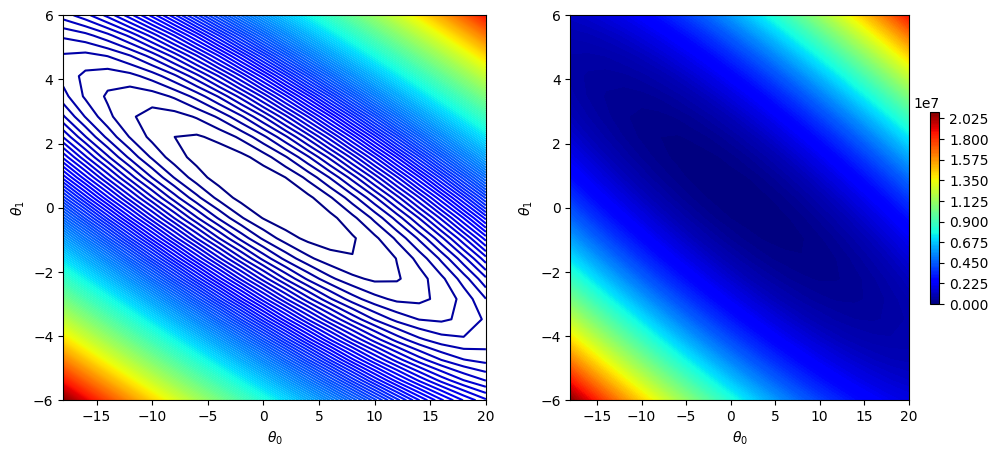

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

surface = axes[0].contour(T0, T1, Z, 150, cmap='jet')
_ = axes[0].set_ylabel(r"$\theta_1$")
_ = axes[0].set_xlabel(r"$\theta_0$")

surface_full = axes[1].contourf(T0, T1, Z, 150, cmap='jet')
_ = axes[1].set_ylabel(r"$\theta_1$")
_ = axes[1].set_xlabel(r"$\theta_0$")

_ = fig.colorbar(surface_full, shrink=0.5)

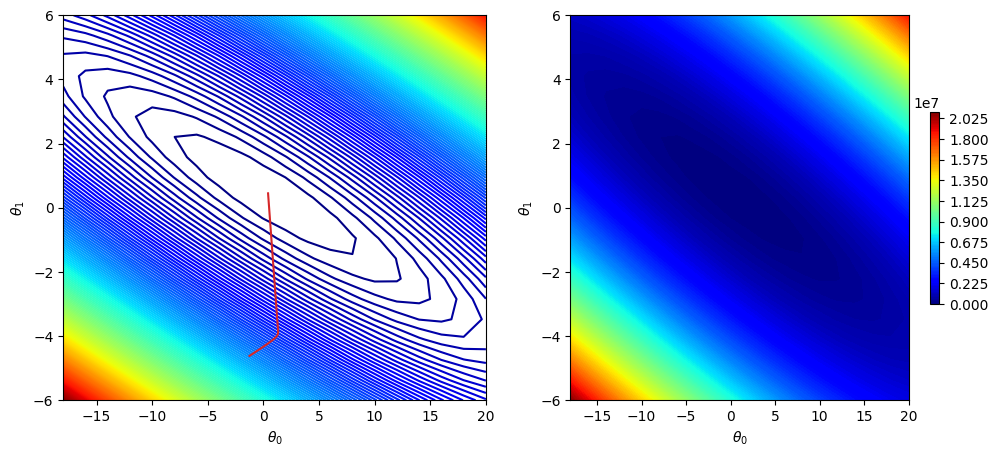

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

surface = axes[0].contour(T0, T1, Z, 150, cmap='jet')
_ = axes[0].set_ylabel(r"$\theta_1$")
_ = axes[0].set_xlabel(r"$\theta_0$")
_ = axes[0].plot(theta_1, theta_0, color='tab:red')

surface_full = axes[1].contourf(T0, T1, Z, 150, cmap='jet')
_ = axes[1].set_ylabel(r"$\theta_1$")
_ = axes[1].set_xlabel(r"$\theta_0$")

_ = fig.colorbar(surface_full, shrink=0.5)

In [106]:
def MSE(y_hat, y):
    return 1/len(y) * np.sum(y_hat - y) ** 2

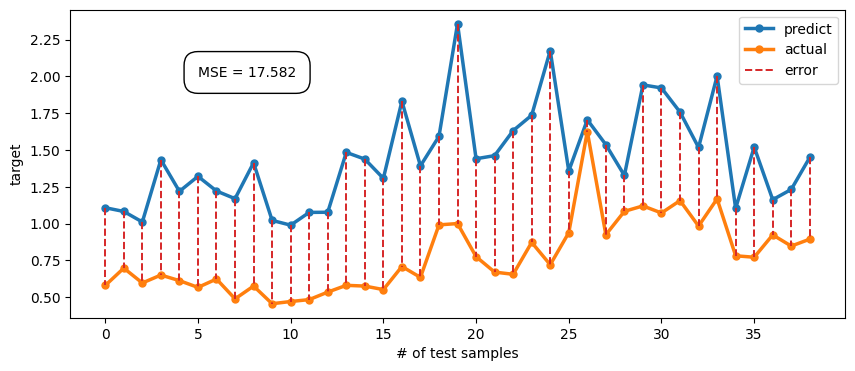

In [110]:
fig, ax = plt.subplots(figsize=(10, 4))

pred = (theta_result[0] + theta_result[1] * df.loc[20_601:, 'MedInc']).values
actual = df.loc[20_601:, 'target'].values

_ = ax.plot(pred, label='predict', marker='.', linewidth=2.5, markersize=10)
_ = ax.plot(actual, label='actual', marker='.', linewidth=2.5, markersize=10)
_ = ax.vlines(x=np.arange(39), ymin=pred, ymax=actual, color='tab:red', linestyles='--', linewidth=1.4, label='error')
_ = ax.text(5, 2, f'MSE = {round(MSE(pred, actual), 3)}', bbox=dict(facecolor='none', boxstyle='round,pad=1'))

_ = ax.set_xlabel('# of test samples')
_ = ax.set_ylabel('target')
_ = ax.legend()

### Multivariate Regression

In [112]:
X = dataset['data']
y = dataset['target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=11)

In [113]:
print(f"x_train'shape: {x_train.shape}")
print(f"y_train'shape: {y_train.shape}")
print()
print(f"x_test'shape: {x_test.shape}")
print(f"y_test'shape: {y_test.shape}")

x_train'shape: (18576, 8)
y_train'shape: (18576,)

x_test'shape: (2064, 8)
y_test'shape: (2064,)


In [114]:
multi_reg_model = LinearRegression()
multi_reg_model.fit(X=x_train, y=y_train)

LinearRegression()

In [115]:
predict = multi_reg_model.predict(x_test)

In [116]:
print(f"MSE: {mean_squared_error(y_test, predict)}")

MSE: 0.5070139480210426


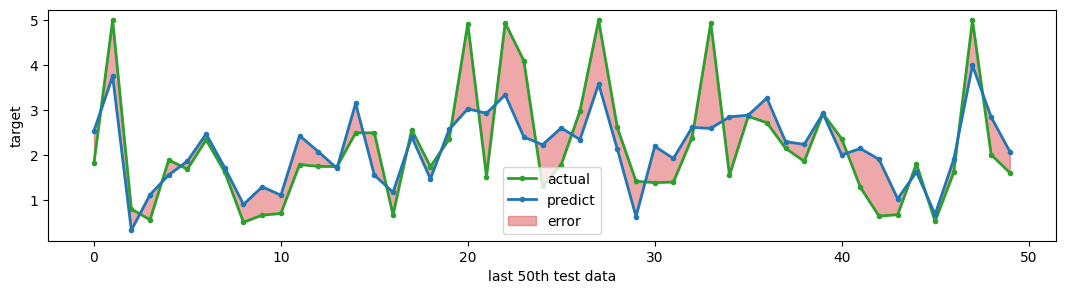

In [134]:
fig, ax = plt.subplots(figsize=(13, 3))

_ = ax.plot(y_test[-50:], marker='.', linewidth=2, label='actual', color='tab:green')
_ = ax.plot(predict[-50:], marker='.', linewidth=2, label='predict', color='tab:blue')
_ = ax.fill_between(np.arange(50), predict[-50:], y_test[-50:], color='tab:red', alpha=0.4, label='error')

_ = ax.set_ylabel("target")
_ = ax.set_xlabel("last 50th test data")

_ = ax.legend()

In [73]:
print(f"theta:{multi_reg_model.coef_}\n")
print(f"intercept: {multi_reg_model.intercept_}")

theta:[ 4.326e-01  9.393e-03 -1.012e-01  6.117e-01 -3.961e-06 -3.598e-03
 -4.242e-01 -4.381e-01]

intercept: -37.24476118712664
